# <font color=red>Task No. 1</font>

## Prediction using Supervised ML - In this task we will predict the percentage of marks of an student based on the number of study hours.

# *By Nikalas Bhandakkar*

In [4]:
#importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [11]:
#reading the data to a dataframe

data= pd.read_csv('C:\\Users\\nikal_000\\Desktop\\TSF Internship\\scorehours.csv')

In [12]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
data.shape

(25, 2)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##  Visualizing the data to obtain the correlation between variables

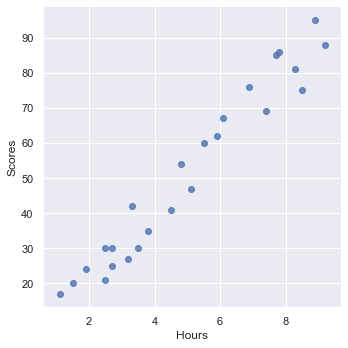

In [133]:
sns.set(style='darkgrid')
sns.lmplot('Hours','Scores',data=data,fit_reg=False)

## From scatter plot we obatained liner correlation between hours studied and scores obtained.

In [43]:
#Confirming the correlation obtained from scatter plot by using .corr() command.

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## preparing the data for model

In [73]:
#defining input features and output features
X = data.Hours
y = data.Scores

In [110]:
#Splitting data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=3)

print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)


(17,) (8,) (17,) (8,)


In [91]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Model Training

In [99]:
from sklearn.linear_model import LinearRegression

lgr = LinearRegression(fit_intercept=True)

model=lgr.fit(X_train,y_train)

## Model Evaluation

In [109]:
from sklearn import metrics

predictions = lgr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MSE: 36.25287810293976
RMSE: 6.021036298091863


In [108]:
# R squared value (Accuracy)
R_test=model.score(X_test,y_test)
R_train=model.score(X_train,y_train)
print(R_test)
print(R_train)

0.9388072529120122
0.9563209860190124


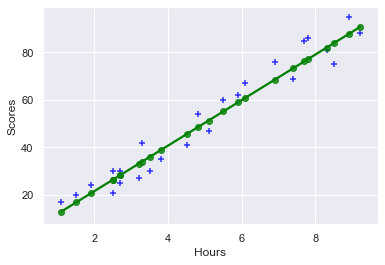

In [137]:
#Plotting results

sns.regplot(data.Hours, data.Scores, marker = '+', color = 'blue',fit_reg=False)

#plotting the line of best fit

sns.regplot(data.Hours, lgr.predict(data[['Hours']]), color = 'green')


## Predictions 

In [114]:
inp = float(input("Enter hours studied: "))
y_pred = lgr.predict([[inp]])
s = str(y_pred)
print("Predicted Score: {}" .format(s[2:-2]))

Enter hours studied: 3
Predicted Score: 31.19807676
